In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.describe

<bound method NDFrame.describe of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
df.columns = ['transaction_hours','type','transaction_amt','sender','sender_bal_before','sender_bal_after','receiver','receiver_bal_before','receiver_bal_after','isFraud','isFlaggedFraud']

In [15]:
features = ['transaction_hours','transaction_amt','sender_bal_before','sender_bal_after','receiver_bal_before','receiver_bal_after']

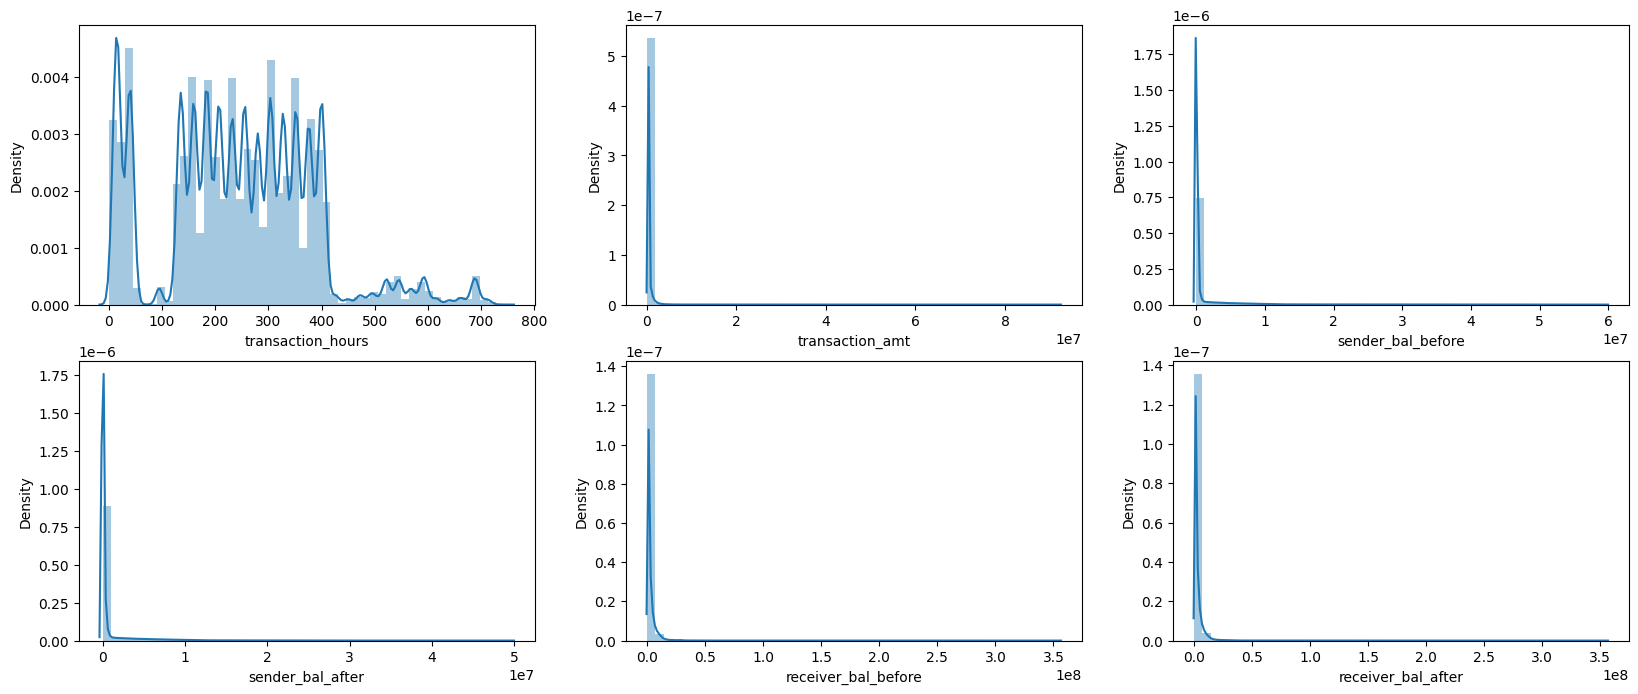

In [16]:
plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')

for feature in features:
    plt.subplot(2,3,features.index(feature)+1)
    sns.distplot(df[feature])
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include = 'number')
correlation_matrix = numeric_df.corr()
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df

,transaction_hours,transaction_amt,sender_bal_before,sender_bal_after,receiver_bal_before,receiver_bal_after,isFraud,isFlaggedFraud
transaction_hours,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
transaction_amt,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
sender_bal_before,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
sender_bal_after,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
receiver_bal_before,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
receiver_bal_after,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [23]:
df['isFraud'].value_counts(normalize = True)

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

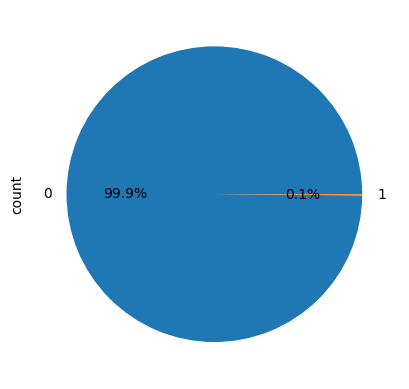

In [24]:
df['isFraud'].value_counts().plot.pie(autopct ='%1.1f%%');

In [25]:
non_fraud=df[df['isFraud'] == 0]
fraud=df[df['isFraud'] == 1]

In [ ]:
df=df.drop(['isFlaggedFraud','sender','receiver'],axis = 1)

In [28]:
df.columns

Index(['transaction_hours', 'type', 'transaction_amt', 'sender_bal_before',
       'sender_bal_after', 'receiver_bal_before', 'receiver_bal_after',
       'isFraud'],
      dtype='object')

In [30]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [31]:
df.head()

,transaction_hours,type,transaction_amt,sender_bal_before,sender_bal_after,receiver_bal_before,receiver_bal_after,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [32]:
X = df.drop(['isFraud'], axis = 1)
y = df.isFraud

In [34]:
X.shape, y.shape

((6362620, 7), (6362620,))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5090096, 7), (1272524, 7), (5090096,), (1272524,))

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [40]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
X_train.shape, X_test.shape

((5090096, 7), (1272524, 7))

In [41]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 6545
Before OverSampling, counts of label '0': 5083551 



In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_res, y_res = smote.fit_resample(X_train, y_train.ravel())

X_res = X_res.reshape(X_res.shape[0], X_res.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [45]:
print('After OverSampling, the shape of train_X:{}'.format(X_res.shape))
print('After OverSampling, the shape of train_y:{}.\n'.format(y_res.shape))

print("After OverSampling, counts of label '1':{}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0':{}".format(sum(y_res == 0)))

After OverSampling, the shape of train_X:(10167102, 7, 1)
After OverSampling, the shape of train_y:(10167102,).

After OverSampling, counts of label '1':5083551
After OverSampling, counts of label '0':5083551


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras. layers import Dense, Flatten, Conv1D, BatchNormalization, Dropout

In [49]:
model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 2, activation = 'relu', input_shape = X_res[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters = 64, kernel_size = 2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'relu'))

In [51]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 6, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 5, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 5, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,249 (98.63 KB)

 Trainable params: 25,057 (97.88 KB)

 Non-trainable params: 192 (768.00 B)

In [52]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [53]:
history = model.fit(X_res, y_res, epochs = 1, validation_data = (X_test,y_test))

317722/317722 ━━━━━━━━━━━━━━━━━━━━ 1165s 4ms/step - accuracy: 0.9400 - loss: 0.3223 - val_accuracy: 0.9607 - val_loss: 0.0880


In [56]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.weights.h5")

print("Model architecture and weights saved successfully.")

Model architecture and weights saved successfully.


BFloat-16

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, BatchNormalization, Dropout

In [59]:
model2 = Sequential()

model2.add(Conv1D(filters = 32, kernel_size = 2, activation = 'relu', input_shape = X_res[0].shape))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Conv1D(filters = 64, kernel_size = 2, activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(64, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation = 'relu'))

In [60]:
policy = tf.keras.mixed_precision.Policy('mixed_bfloat16')
tf.keras.mixed_precision.set_global_policy(policy)

In [62]:
X_train_bfloat = tf.convert_to_tensor(X_res, dtype = tf.bfloat16)

In [63]:
X_train_bfloat.shape

TensorShape([10167102, 7, 1])

In [64]:
X_test_bfloat = tf.convert_to_tensor(X_test, dtype = tf.bfloat16)

In [69]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
history2 = model2.fit(X_train_bfloat, y_res, epochs = 1, validation_data = (X_test_bfloat, y_test))

317722/317722 ━━━━━━━━━━━━━━━━━━━━ 1842s 6ms/step - accuracy: 0.9410 - loss: 0.3943 - val_accuracy: 0.9639 - val_loss: 0.0924


In [71]:
model2_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model2_json)

model.save_weights("model2.weights.h5")

print("Model architecture and weights saved successfully.")

Model architecture and weights saved successfully.
